<a href="https://colab.research.google.com/github/RoshanJamthe/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# <b><u>Data Wrangling

## Dataset Loading

In [1]:
# Importing Data Wrangling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import time

import warnings
warnings.simplefilter("ignore")

In [2]:
# This helps to show all the columns
pd.set_option('display.max_columns', 200)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/ML/Bank Marketing Effectiveness Prediction/bank-full.csv",delimiter=';')

In [5]:
# View the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



####After having a first look at the data, we certainly need data encoding, handling missing values (unkown are nothing but the missing values)



In [6]:
df.replace('unknown',np.nan,inplace=True)

In [7]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB




#### 'poutcome' has nearly 80% missing values, 'job','education' and 'contact' has their share



In [8]:
# Describe the features
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



#### There is a large variation in the 'balance','duration','campaign','pdays', as well as 'previous' feature.

#### 5 out of 6 features seems to have outliers



In [9]:
# Get unique values from each feature
def unique_values(df):
  for col in df.columns:
    print(f'{col} : {df[col].unique()}')
    print("-*-"*30)

unique_values(df)    

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
job : ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
marital : ['married' 'single' 'divorced']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
education : ['tertiary' 'secondary' nan 'primary']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
default : ['no' 'yes']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
balance : [ 2143    29     2 ...  8205


####* There is no mismatched data 

## Check for Duplicated data 

In [10]:
df.duplicated().sum()

0



####* The dataset has 0 duplicate rows




## nan/missing value handling

In [11]:
# Missing Value Count Function for the dataframe
def show_missing(df):
    missing = df.columns[df.isnull().any()].tolist()

    # Missing data counts and percentage
    print('Missing Data Count')
    print(df[missing].isnull().sum().sort_values(ascending = False))
    print('--'*50)
    print('Missing Data Percentage')
    print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

    return missing

# Check the missing data for the current data
show_missing(df)

Missing Data Count
poutcome     36959
contact      13020
education     1857
job            288
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
poutcome     81.75
contact      28.80
education     4.11
job           0.64
dtype: float64


['job', 'education', 'contact', 'poutcome']

#### 'poutcome' variable is certainly important since its the impact of the previous campaign, there we need to fill missing spots with appropriate value.

In [12]:
# It's a categorical feature, so we are filling it with -1 which means those people reportedly never attended the campaign.
df['poutcome'].fillna(-1,inplace=True)

###'contact' feature

In [13]:
# Check the unique entries
df['contact'].unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [14]:
# Check the value count
df['contact'].value_counts()

cellular     29285
telephone     2906
Name: contact, dtype: int64

In [15]:
df[df['contact'].isna()]['y'].value_counts()

no     12490
yes      530
Name: y, dtype: int64

In [16]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

So, here we are in risk of losing ~10% of important data, so let's fill the nan values with 0

In [17]:
df['contact'].fillna(0,inplace=True)

### 'education' feature

In [18]:
# Check the unique entries
df['education'].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [19]:
df[df['education'].isna()]['y'].value_counts()

no     1605
yes     252
Name: y, dtype: int64

Text(0.5, 1.0, 'education distribution')

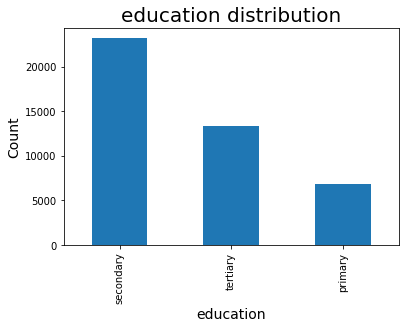

In [20]:
# Get 'education' feature distribution using barplot
df['education'].value_counts().plot.bar()
plt.xlabel('education',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('education distribution',fontsize=20)

In [21]:
# Fill na with mode
df['education'].fillna(df['education'].mode()[0],inplace=True)

###'job' feature

In [22]:
# Check the unique entries
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [23]:
# Check the influence of the 'job' feature
df[df['job'].isna()]['y'].value_counts()

no     254
yes     34
Name: y, dtype: int64

####let's drop all such nan rows, since they are so few.

In [24]:
# Let's get only non nan valued 'job' rows
df = df[~df['job'].isna()]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44923 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        44923 non-null  int64 
 1   job        44923 non-null  object
 2   marital    44923 non-null  object
 3   education  44923 non-null  object
 4   default    44923 non-null  object
 5   balance    44923 non-null  int64 
 6   housing    44923 non-null  object
 7   loan       44923 non-null  object
 8   contact    44923 non-null  object
 9   day        44923 non-null  int64 
 10  month      44923 non-null  object
 11  duration   44923 non-null  int64 
 12  campaign   44923 non-null  int64 
 13  pdays      44923 non-null  int64 
 14  previous   44923 non-null  int64 
 15  poutcome   44923 non-null  object
 16  y          44923 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


#### We have taken care of all the missing values! pheww!

## Outliers treatment

In [26]:
# Get numerical value features
numerical_features = df.describe().columns
numerical_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

### Bivariate inspection

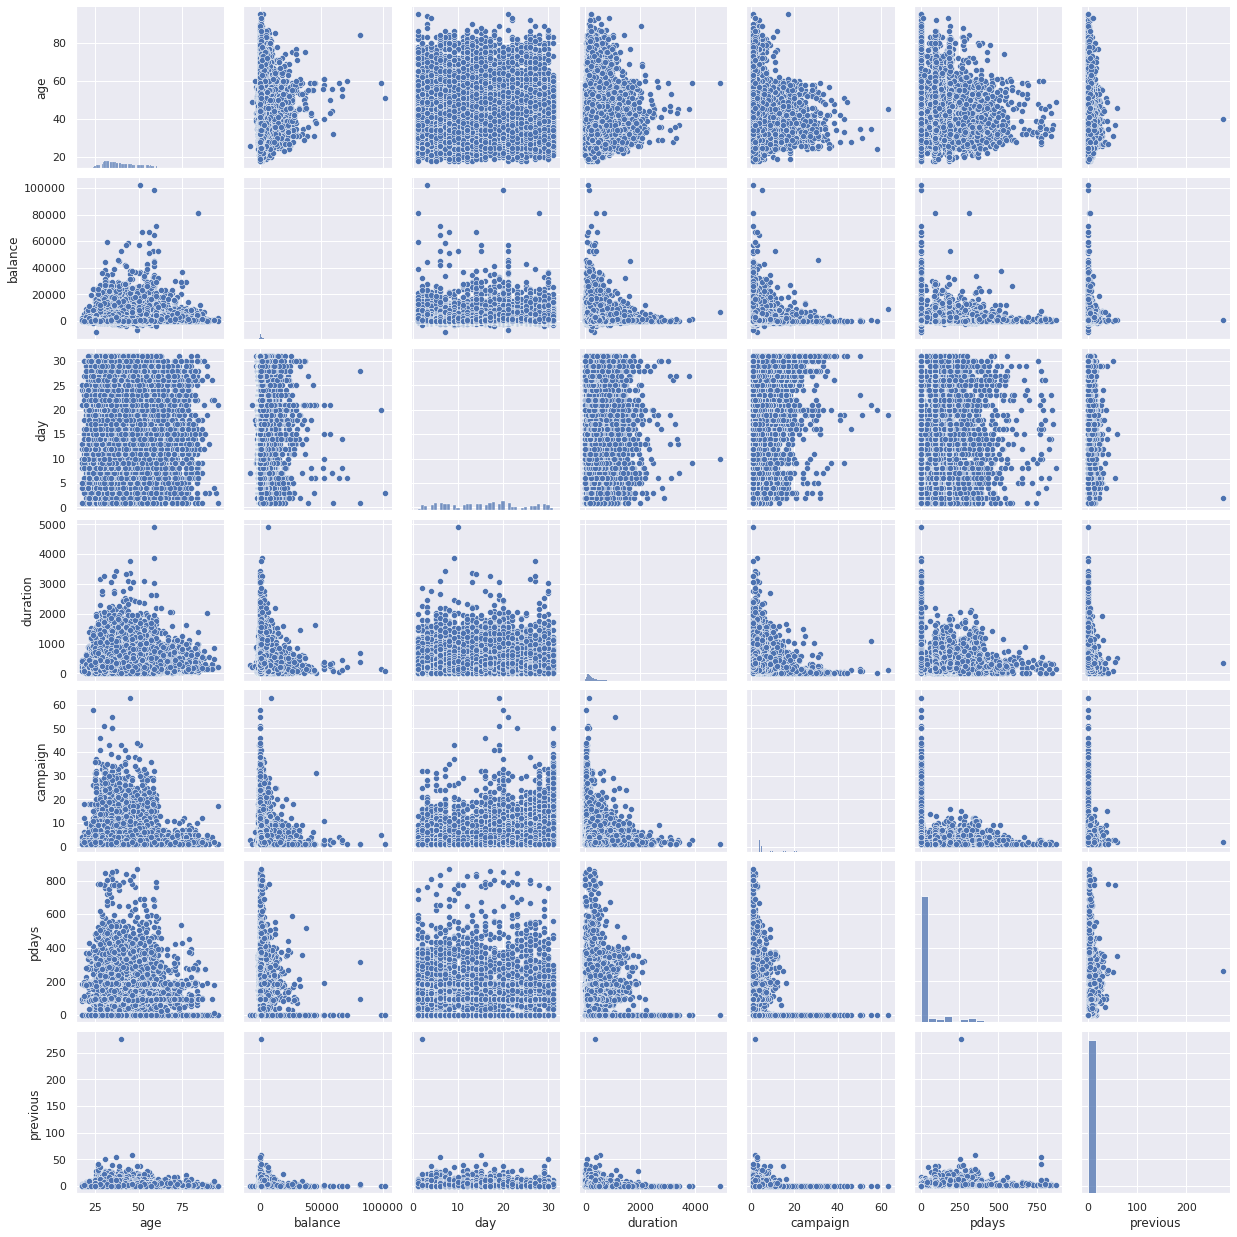

In [27]:
#pairplot
sns.set()
sns.pairplot(df[numerical_features], size = 2.5)
plt.show()

####(balance, duration, campaign, pdays, previous) all this features have serious outlier problem.

#### Let's view it close with distplot from seaborn

### Univariate inspection

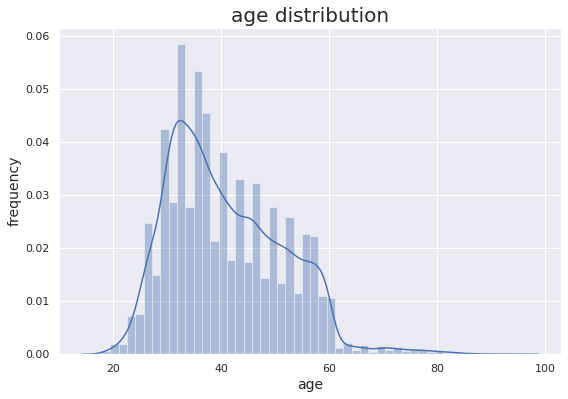

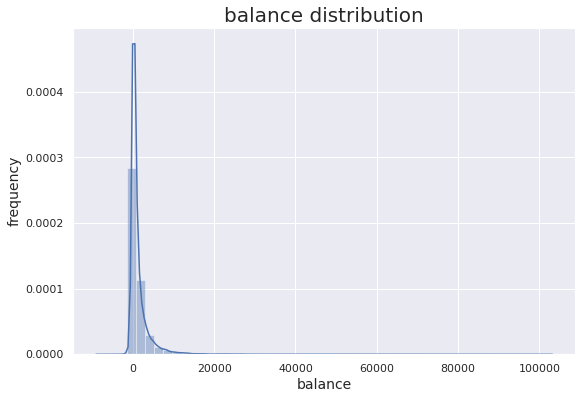

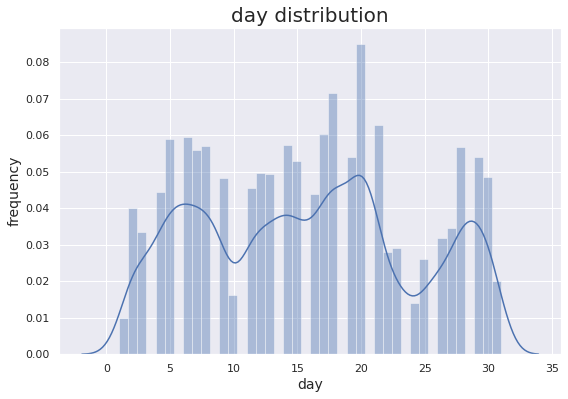

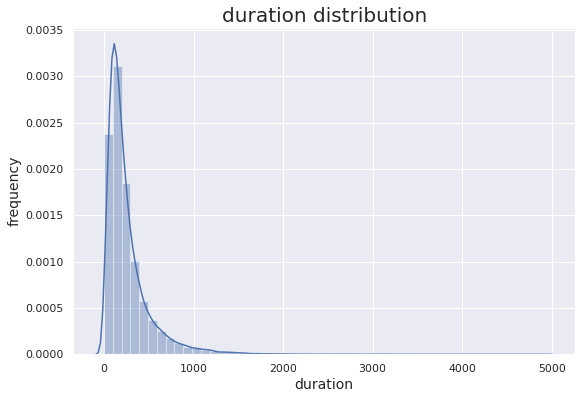

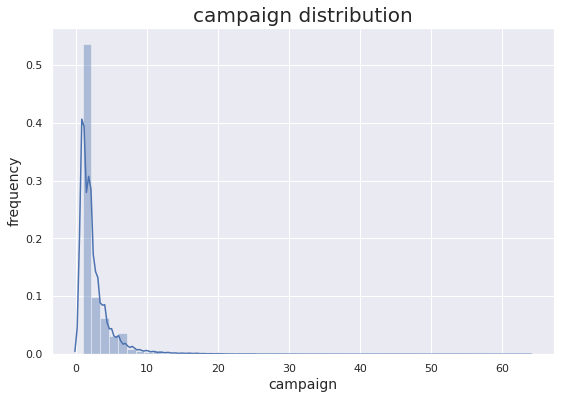

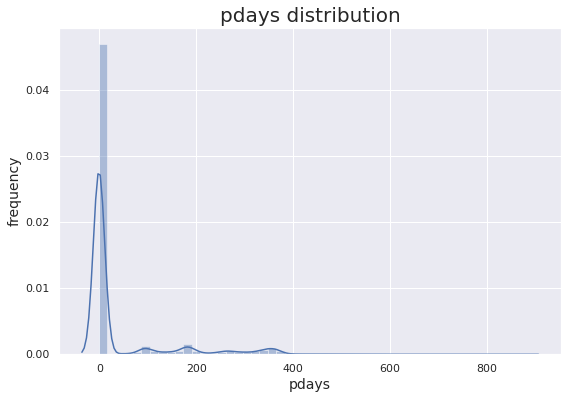

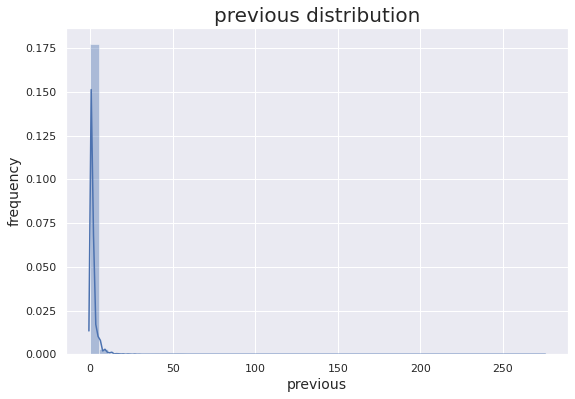

In [28]:
def get_distplot(df,col_list):
  for col in col_list:
    # Get feature distribution using distplot
    plt.figure(figsize=(9,6))
    sns.distplot(df[col])
    plt.xlabel(col,fontsize=14)
    plt.ylabel('frequency',fontsize=14)
    plt.title(f'{col} distribution',fontsize=20)

# Get the plot
get_distplot(df,numerical_features)

### Outliers capping
These features are positively skewed, so we will be talking about limit on upper side only

In [29]:
#Let's set outliers upper limit
print("Upper Limit")
for col in numerical_features:
  print(f'{col} : {df[col].quantile(.95)}')

print("  ")
#Let's set outliers lower limit
print("Lower Limit")
for col in numerical_features:
  print(f'{col} : {df[col].quantile(.01)}')

Upper Limit
age : 59.0
balance : 5763.0
day : 29.0
duration : 751.0
campaign : 8.0
pdays : 318.0
previous : 3.0
  
Lower Limit
age : 23.0
balance : -627.78
day : 2.0
duration : 11.0
campaign : 1.0
pdays : -1.0
previous : 0.0


#### This limit seems pretty reasonable, so let's keep only 99% of variance

In [30]:
#Let's set outliers limit
for col in numerical_features:
  upper_limit = df[col].quantile(.95)
  lower_limit = df[col].quantile(.01)
  df = df[(df[col]<=upper_limit) & (df[col]>=lower_limit)]  

In [31]:
# Check the updated dataframe shape
df.shape

(31034, 17)

## Feature Encoding

In [32]:
# Rename the target feature
df = df.rename(columns={'y':'Target'})

In [33]:
# Get categorical features
categorical_features = df.describe(include='object').columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [34]:
# Get unique values of the categorical features
for col in categorical_features:
  print(f'{col} : {df[col].unique()}')
  print('**'*40)

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
********************************************************************************
marital : ['married' 'single' 'divorced']
********************************************************************************
education : ['tertiary' 'secondary' 'primary']
********************************************************************************
default : ['no' 'yes']
********************************************************************************
housing : ['yes' 'no']
********************************************************************************
loan : ['no' 'yes']
********************************************************************************
contact : [0 'cellular' 'telephone']
********************************************************************************
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
**************

Let's apply following steps to encode each variable in above list,

job : dummy variables

marital : dummy variables

education : ordinal mapping  (primary =1, secondary =2, tertiary=3)

default, housing, loan : binary mapping (no =0, yes =1)

contact :  dummy variables

month : ordinal mapping  (jan =1, feb =2, ... , dec =12)

poutcome : binary mapping (failure =0, success =1) 

Target : binary mapping (no =0, yes =1)

### Dummy variables 
For job, maritial, contact variables

In [35]:
# Get dummy variables for the intended variables
df = pd.get_dummies(df, columns=["job", "marital","contact"])

### 'poutcome' feature 

In [36]:
df['poutcome'].value_counts()

-1         27722
failure     2063
other        625
success      624
Name: poutcome, dtype: int64

#### 'other' category significance is unclear so we will delete those rows

In [37]:
# other category has no defined significance, hence we are dropping those rows
df = df[df['poutcome']!='other']

In [38]:
# Discrete conversion nan to -1, failure to 0, success to 1
df['poutcome'] = df['poutcome'].map({'failure':0,'success':1})

In [39]:
df['poutcome'].fillna(-1,inplace=True)

Text(0.5, 1.0, 'poutcome distribution')

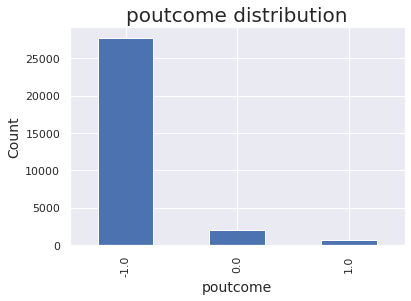

In [40]:
# Get 'poutcome' feature distribution using barplot
df['poutcome'].value_counts().plot.bar()
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('poutcome distribution',fontsize=20)

### One hot encoding
The rest categorical variables

In [41]:
# Use a dictionary and replace function
encoders_nums = {
                  "education":{"primary":1,"secondary":2,"tertiary":3},
                 "default":{"yes":1,"no":0},
                 "housing":{"yes":1,"no":0},
                 "loan":{"yes":1,"no":0},
                 "month":{"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12},
                 "Target":{"yes":1,"no":0}}

df = df.replace(encoders_nums)         

In [42]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_0,contact_cellular,contact_telephone
0,58,3,0,2143,1,0,5,5,261,1,-1,0,-1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,44,2,0,29,1,0,5,5,151,1,-1,0,-1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,33,2,0,2,1,1,5,5,76,1,-1,0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,47,2,0,1506,1,0,5,5,92,1,-1,0,-1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5,35,3,0,231,1,0,5,5,139,1,-1,0,-1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0


#### Great! Now, we have all the features in the numeric format.

## Multicollinearity Check

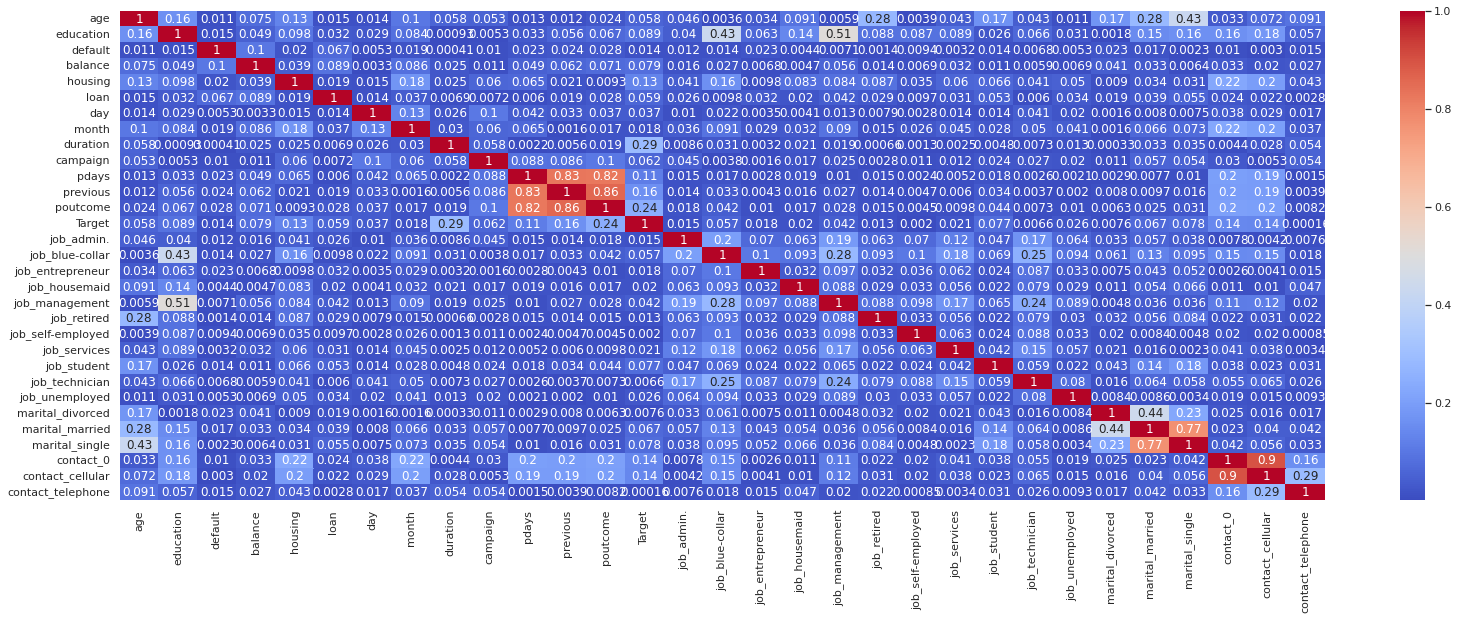

In [43]:
# Get the heatmap using seaborn.heatmap 
plt.figure(figsize=(27,9))
sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')

#### Okay! some variables look collinear with each other, let's inspect it with variance_inflation_factor

In [44]:
# import variance_inflation_factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Create a function to return VIF value for that feature
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame() # create a DataFrame where we will add feature and its respective vif value
    vif["variables"] = X.columns # Variable feature in vif dataframe will have columns from X i.e. input
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # vif value for that column 
    return(vif)

In [46]:
# Check the vif for the features of the current dataframe
calc_vif(df[[i for i in df.describe().columns if i not in ['Target']]])

,variables,VIF
0,age,1.442378
1,education,1.747891
2,default,1.017885
3,balance,1.043429
4,housing,1.162786
5,loan,1.027038
6,day,1.030858
7,month,1.149460
8,duration,1.014233
9,campaign,1.037942


In [47]:
df['marital_single'].sum(), df['marital_married'].sum()

(8600, 18311)

In [48]:
df['contact_0'].sum(), df['contact_cellular'].sum()

(10093, 18839)

In [49]:
# Select features to reduce strong collinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Target','marital_single','contact_0','job_management','age','poutcome']]])

,variables,VIF
0,education,9.160862
1,default,1.035879
2,balance,1.553264
3,housing,2.509875
4,loan,1.237190
5,day,4.701902
6,month,8.132749
7,duration,2.912064
8,campaign,3.337854
9,pdays,3.574246




> We have reduced some strong multicollinearity



#### 3 features namely age, education, poutcome need to be investigated further!

# <b><u>Data Visualization 

In [50]:
# Build a function to get [box_plot and dist_plot for continuous values feature] and [box_plot and bar_plot for discrete plot]
def get_eda(df,dependent_feature):
  for col in df.columns:

    # Continuous features
    if len(df[col].unique())>20:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sns.boxplot(y=df[col])       # Box plot
      fig.set_title('',fontsize=17)
      fig.set_ylabel(col,fontsize=13)
      
      plt.subplot(1, 2, 2)
      fig = sns.distplot(df[col].dropna(),color='purple')  # Dist plot
      fig.set_ylabel('Frequency',fontsize=13)
      fig.set_xlabel(col,fontsize=13)
      plt.title(f'{col} Distribution',fontsize=17)
      plt.show()

    # Categorical features
    else:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sns.boxplot(df[col],df[dependent_feature])  # Box plot
      fig.set_title('')
      fig.set_ylabel(dependent_feature,fontsize=13)

      plt.subplot(1, 2, 2)
      counts = df[col].value_counts().sort_index()
      counts.plot.bar(color='steelblue')              # Bar plot
      plt.xlabel(col,fontsize=13)
      plt.ylabel('count',fontsize=13)
      plt.title(f'count of {col}',fontsize=17)
      plt.show()      

In [51]:
df_new = df[[i for i in df.describe().columns if i not in ['marital_single','contact_0','job_management','age','poutcome','pdays']]].copy()

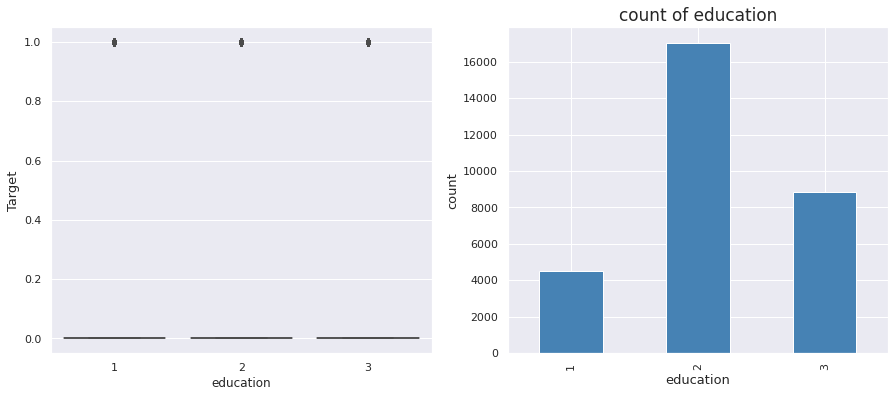

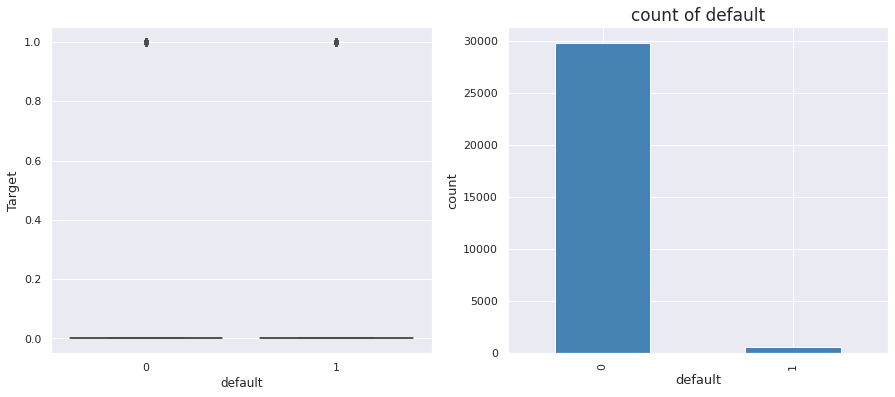

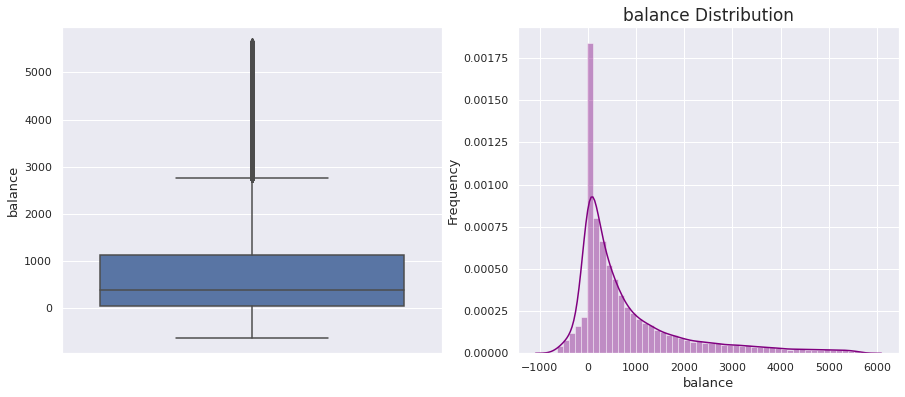

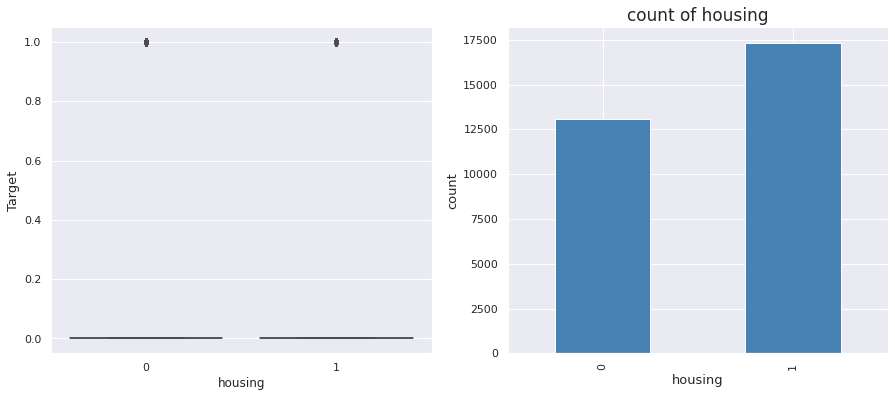

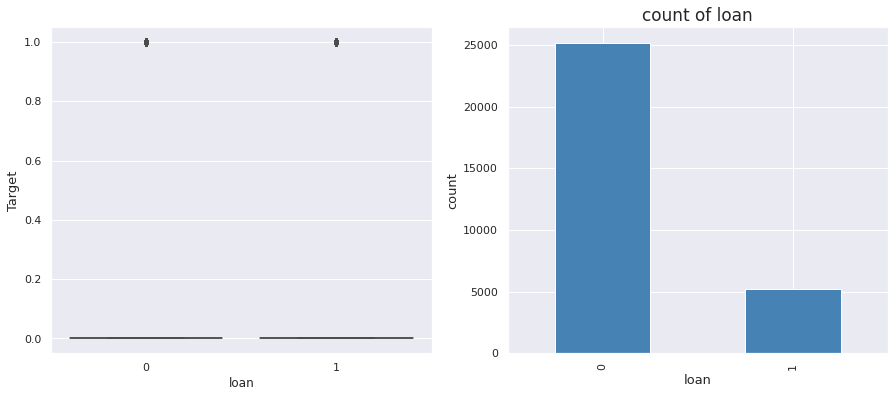

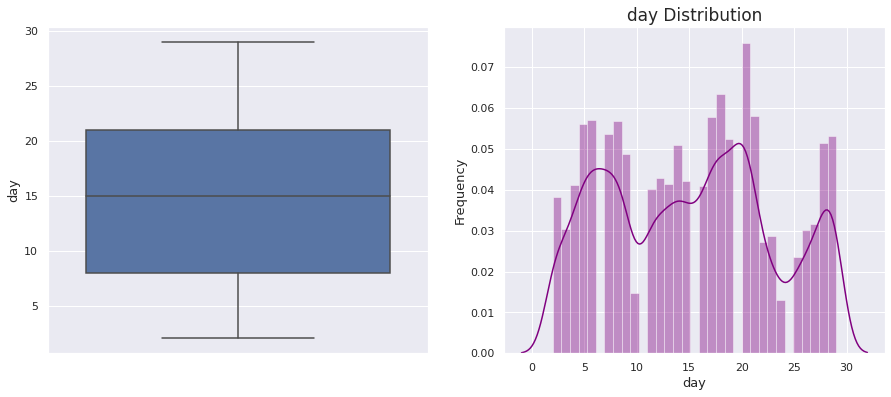

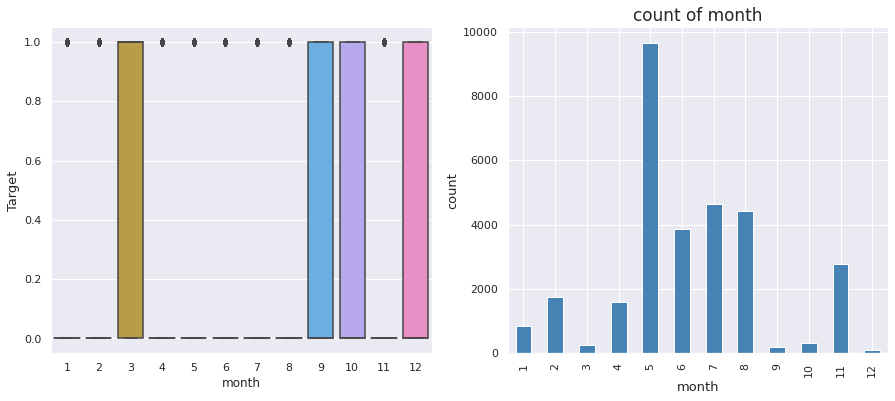

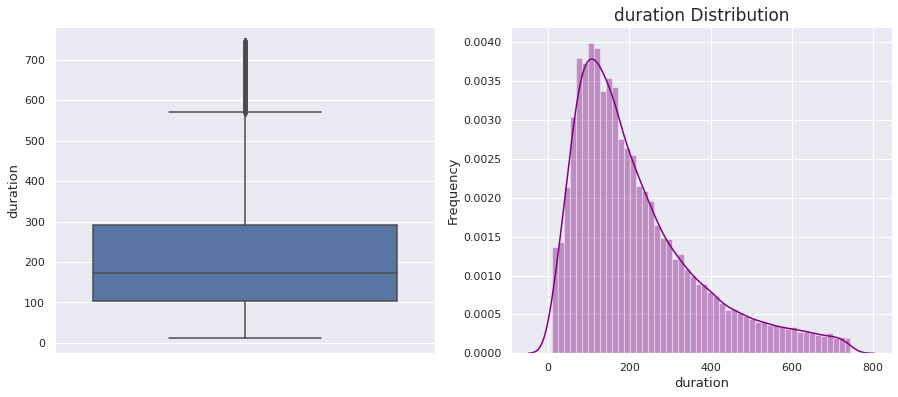

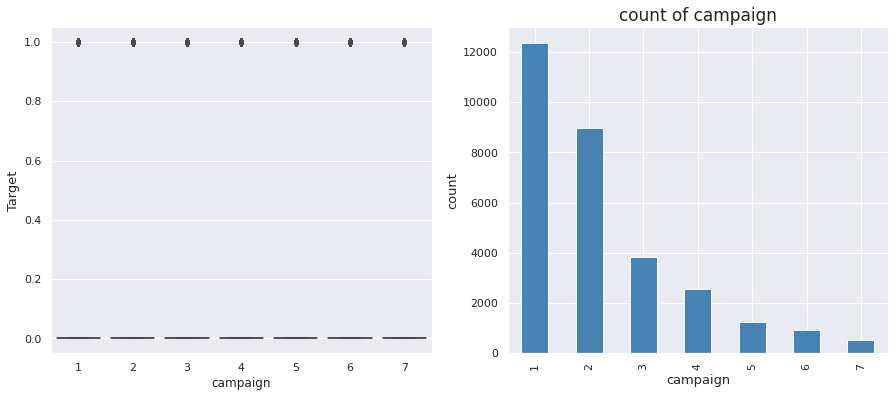

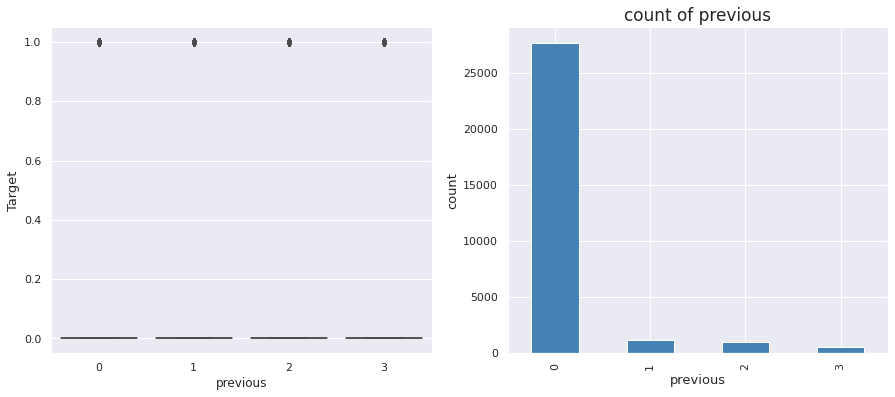

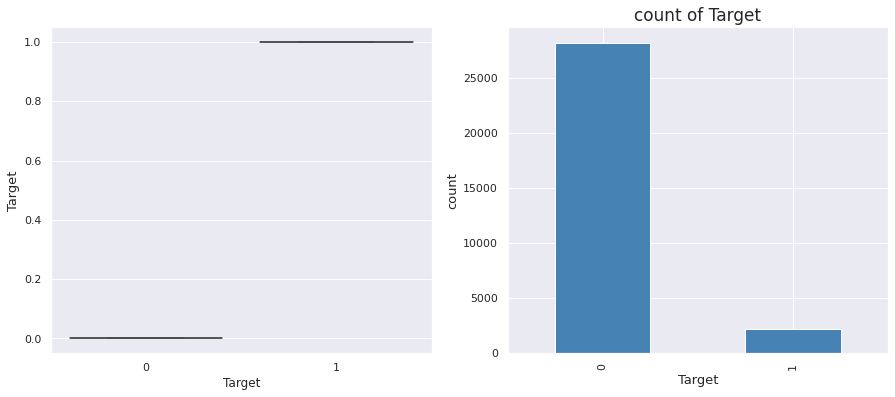

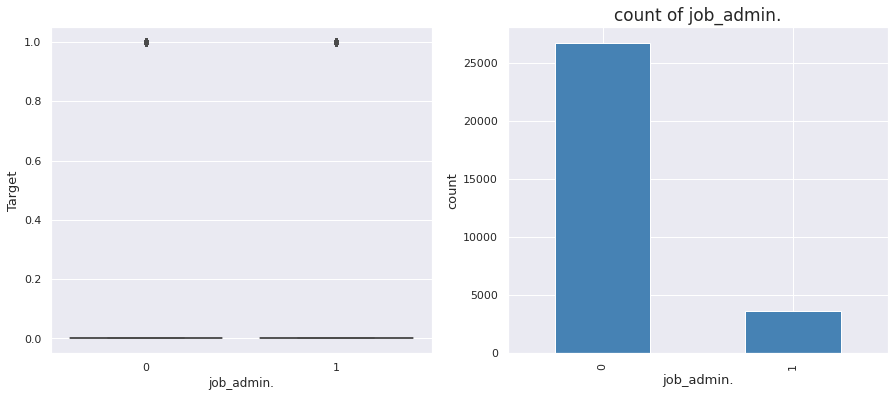

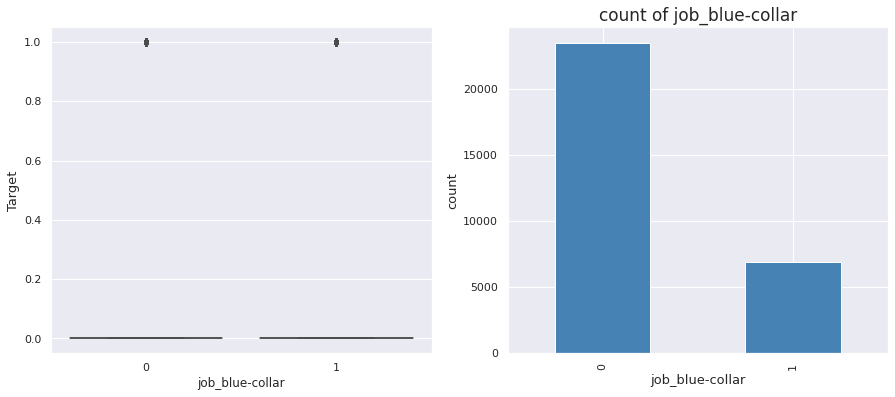

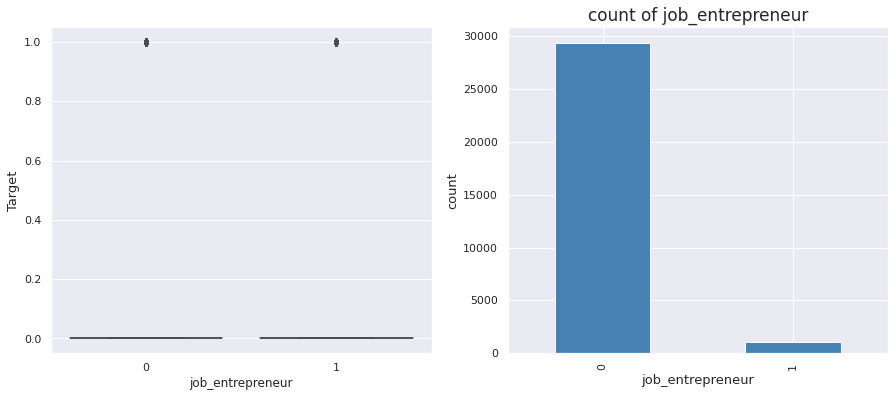

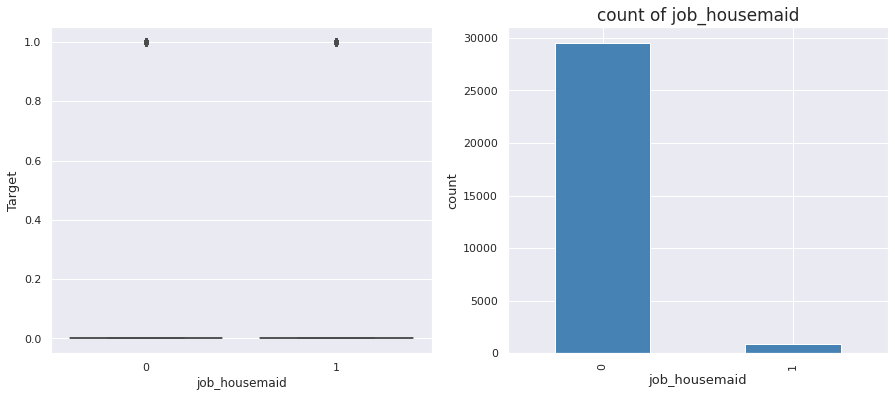

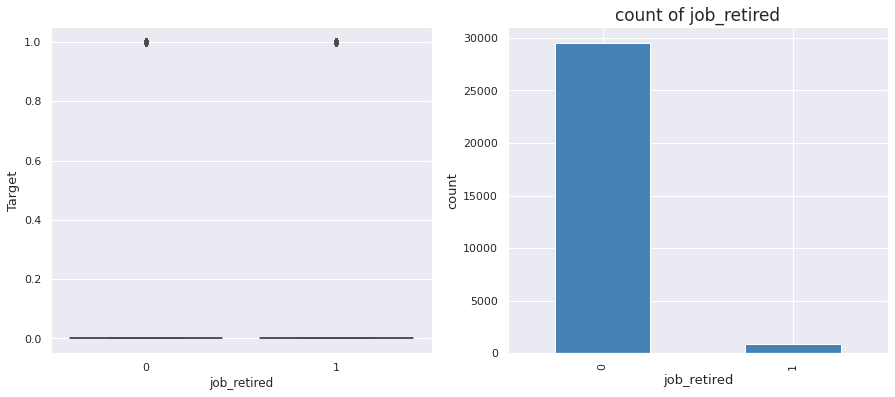

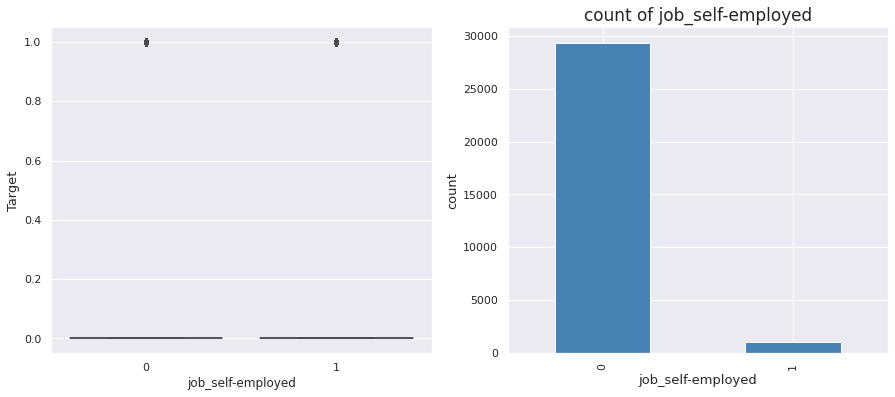

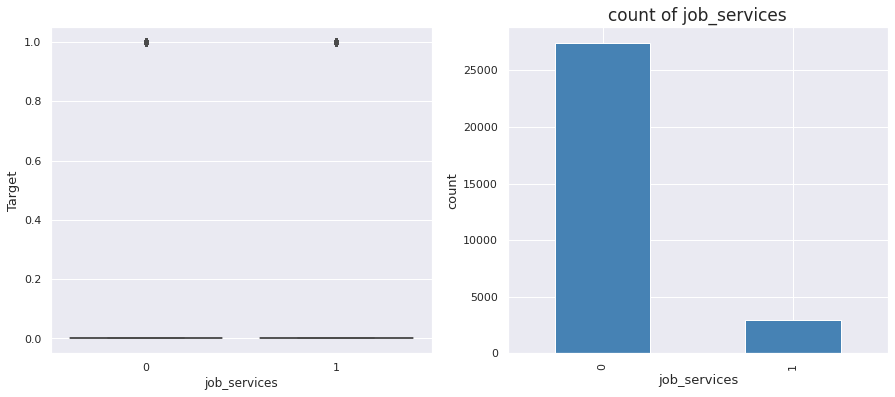

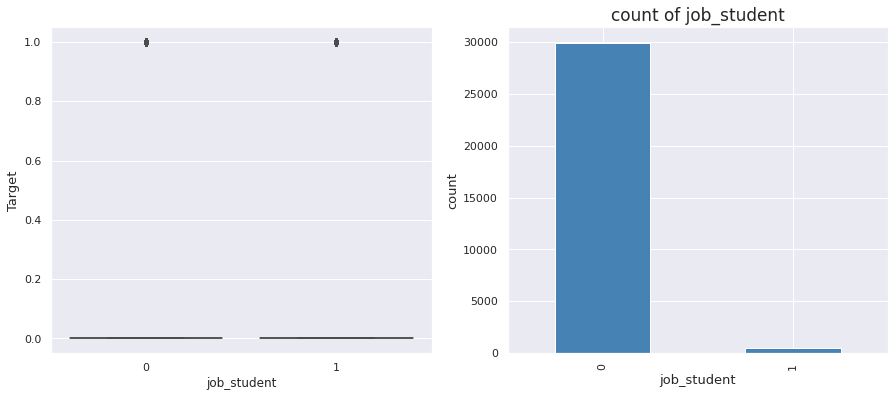

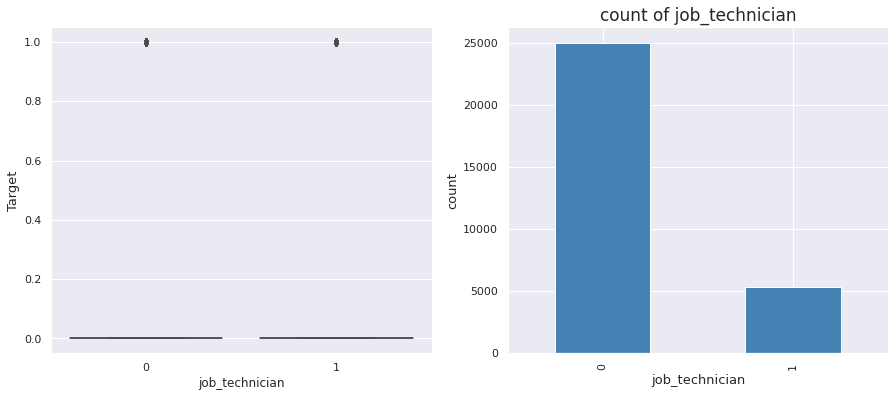

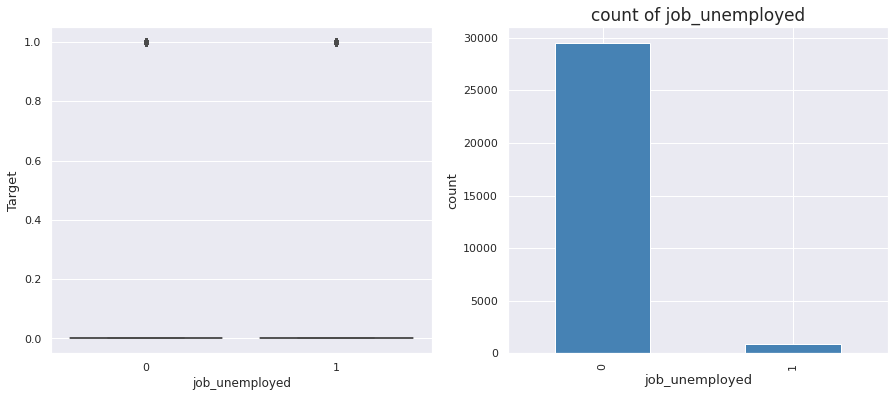

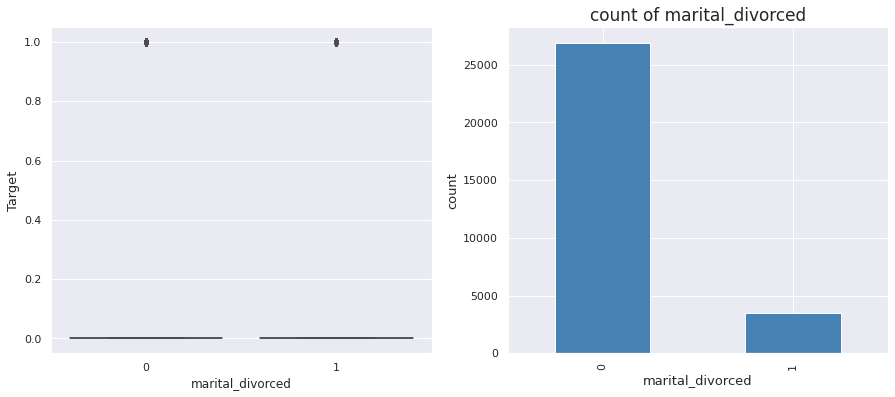

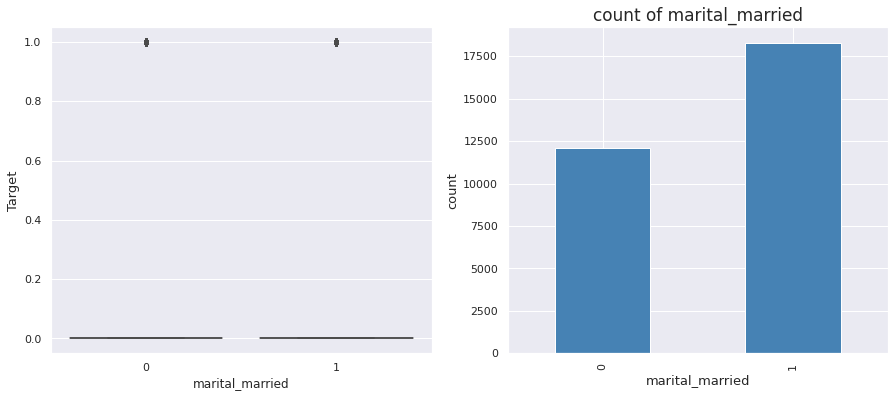

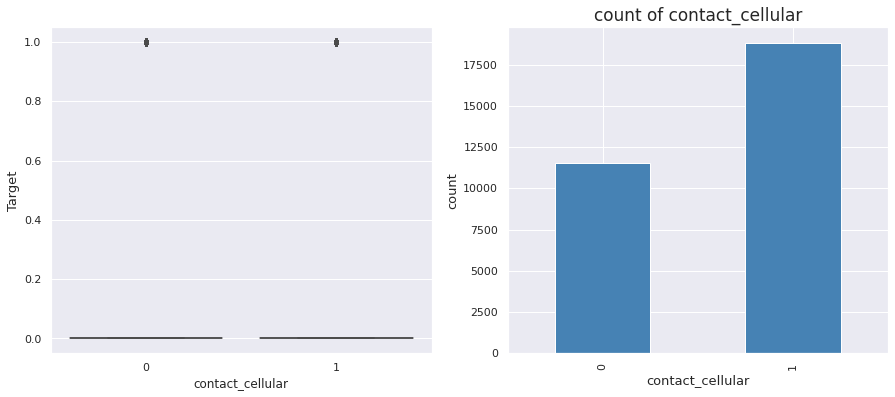

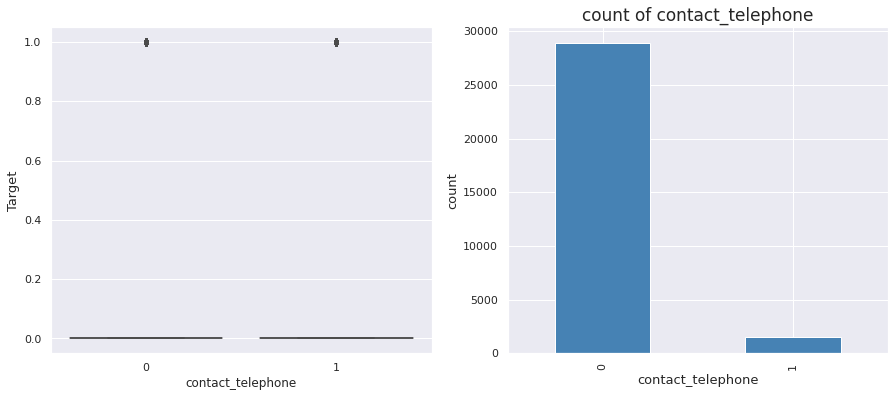

In [52]:
get_eda(df_new,'Target')



> Data seems well balanced now



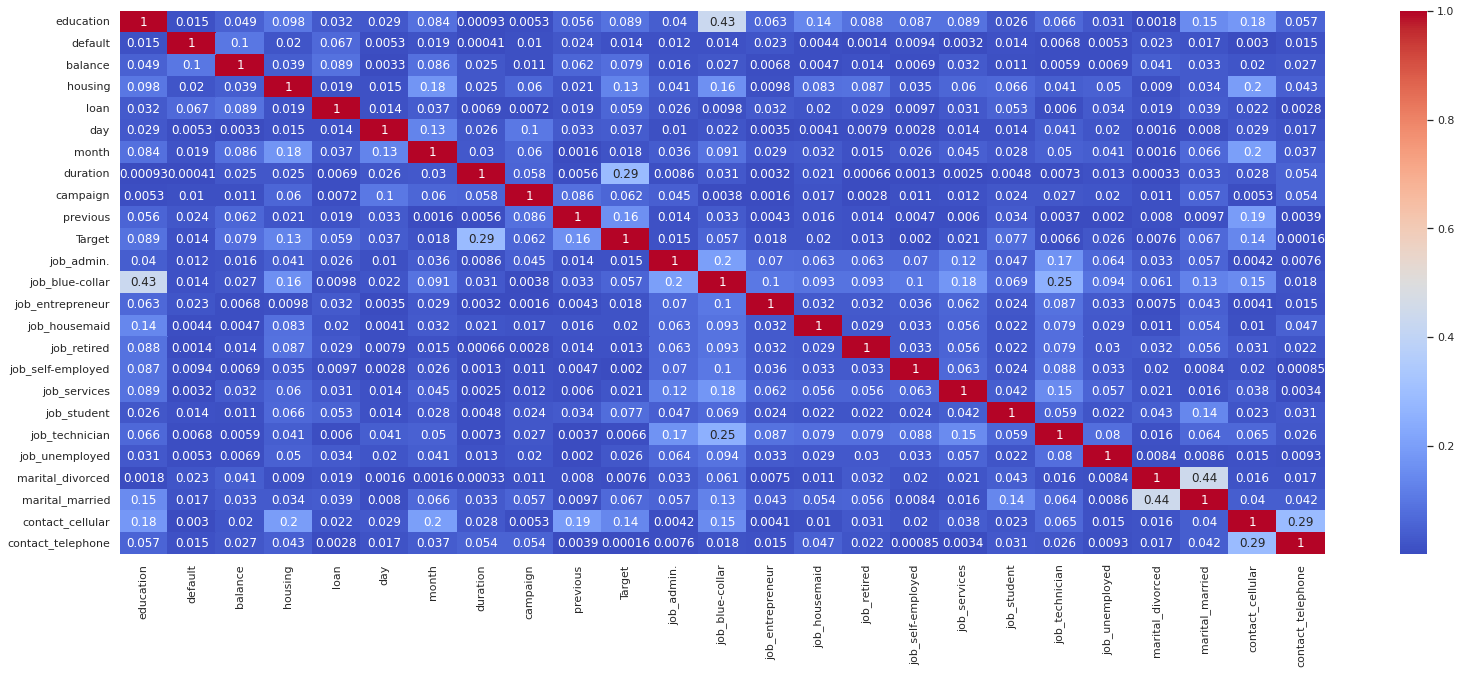

In [53]:
# Get the heatmap using seaborn.heatmap 
plt.figure(figsize=(27,10))
sns.heatmap(abs(df_new.corr()), annot=True, cmap='coolwarm')

Correlation between any two independent variables is not concerning.

# <b><u>Train Test Split and preprocessing

## TrainTestSplit

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df_new.drop('Target',axis=1), df_new['Target'])

print('Original dataset shape', len(df_new))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30409
Resampled dataset shape 56382


In [55]:
x_smote.shape, y_smote.shape

((56382, 24), (56382,))

In [56]:
y_smote.value_counts()

0    28191
1    28191
Name: Target, dtype: int64

In [57]:
x_smote.head()

,education,default,balance,housing,loan,day,month,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,contact_cellular,contact_telephone
0,3,0,2143,1,0,5,5,261,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,0,29,1,0,5,5,151,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,0,2,1,1,5,5,76,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,0,1506,1,0,5,5,92,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,3,0,231,1,0,5,5,139,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
y_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, stratify = y_smote, random_state=0)

# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(45105, 24) (45105,)
(11277, 24) (11277,)


In [60]:
y_train.value_counts()

1    22553
0    22552
Name: Target, dtype: int64

In [61]:
y_test.value_counts()

0    5639
1    5638
Name: Target, dtype: int64

## Standardization (mean=0, s=1) and Normalization [0,1]

In [62]:
from sklearn import preprocessing 

# Standardization
std_scalar = preprocessing.StandardScaler() # The output array contains -ve 0 +ve values

X_train_std = pd.DataFrame(std_scalar.fit_transform(X_train),columns=X_train.columns)
X_test_std = pd.DataFrame(std_scalar.fit_transform(X_test),columns=X_test.columns)

# <b><u> ML models

## <b><u>Logistic regression model 

### Model Training - LogisticRegression

In [63]:
# Import the library
from sklearn.linear_model import LogisticRegression

# Fitting the LogisticRegression on train data
lr = LogisticRegression(fit_intercept=True)
lr.fit(X_train_std , y_train)

LogisticRegression()

In [64]:
# Get the predicted classes
train_class_preds = lr.predict(X_train_std)
test_class_preds = lr.predict(X_test_std)

In [65]:
# Get score for train and test data
lr.score(X_train_std, y_train) , lr.score(X_test_std, y_test)

(0.9041569670768208, 0.9081315952824333)

###Model Performance

In [66]:
# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [67]:
# Get the confusion matrix and label it
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

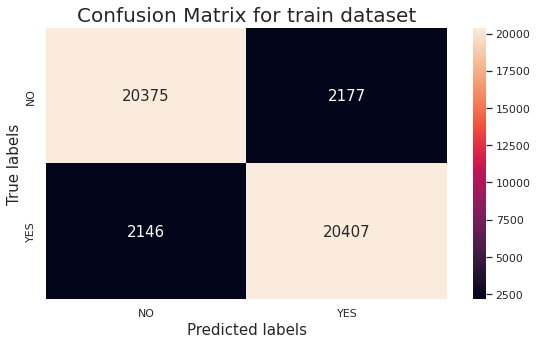

In [68]:
# get confusion matrix for train data
get_confusion_matrix(lr, X_train_std, y_train, 'train')

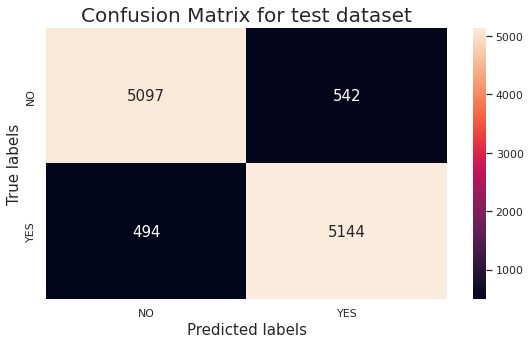

In [69]:
# get confusion matrix for test data
get_confusion_matrix(lr,X_test_std,y_test,'test')

In [70]:
# Get the accuracy score for the individual model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

In [71]:
# Get model performance using function I built, model_performance
individual_model_performance(lr,X_train_std,X_test_std,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.904225,0.908513
1,Accuracy,0.904157,0.908132
2,Recall,0.904846,0.912380
3,Precision,0.903604,0.904678
4,log_loss,3.310340,3.173061
5,roc_auc,0.904157,0.908132


### Model Interpretation

In [173]:
# View the coefficient values
def feature_coefficients(model_name,X):
  labels = df.drop('Target',axis=1).columns
  coef = pd.DataFrame(list(zip(labels,model_name.coef_[0])),columns=['Features','Coef'])
  coef['Absolute coef'] = abs(coef['Coef'])
  coef.sort_values('Coef',ascending=False,inplace=True)
  return coef.reset_index(drop=True)

In [174]:
feature_coefficients(lr,X_train_std)

,Features,Coef,Absolute coef
0,month,1.356872,1.356872
1,campaign,0.395637,0.395637
2,job_technician,0.209037,0.209037
3,default,0.172810,0.172810
4,job_unemployed,-0.123356,0.123356
5,loan,-0.134328,0.134328
6,education,-0.136752,0.136752
7,day,-0.180604,0.180604
8,job_management,-0.314345,0.314345
9,job_entrepreneur,-0.436703,0.436703


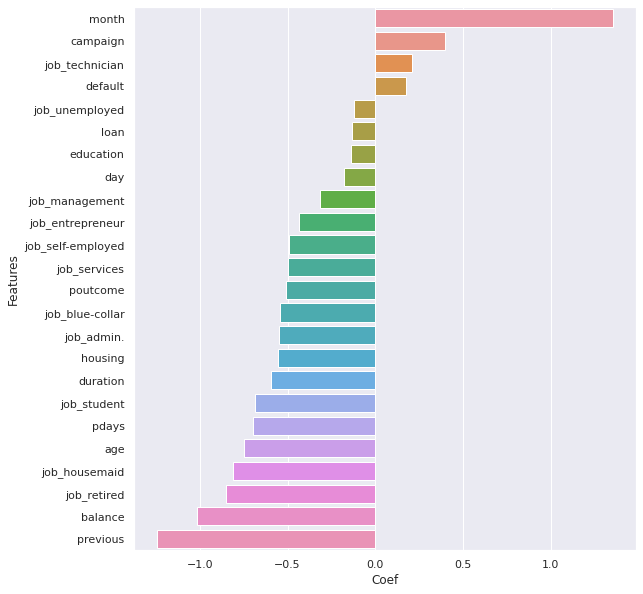

In [175]:
# Plot the feature importance plot using feature coefficients datframe
plt.figure(figsize=(9,10))
sns.barplot(x='Coef',y='Features',data=feature_coefficients(lr ,X_train_std))

## <b><u>XGBClassifier model

### Model Training - XGBClassfier

In [75]:
# Since we need to select the best model out of four, using BayesSeachCV
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.1 MB/s 


In [76]:
# To get best values of hyperparameters use BayesSearch crossvalidation
from skopt import BayesSearchCV

In [77]:
from sklearn import ensemble
from xgboost import XGBClassifier

In [81]:
start = time. time()

# Create an instance of the RandomForestClassifier
xgb_model = XGBClassifier(subsample=0.6, sampling_method = 'gradient_based', colsample_bytree =0.6, random_state=0)

# Grid search
xgb_bayes= BayesSearchCV(estimator=xgb_model,
                       search_spaces = {'max_depth': (5,20),
                                    'min_samples_weight': (0.8,1),
                                    'reg_alpha':(0.01,10), 'gamma':(0.1,1)}, n_iter=20,
                       cv = 4, verbose=3, scoring='accuracy')
# Fit the data
xgb_bayes.fit(X_train_std,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END gamma=0.705746821290386, max_depth=12, min_samples_weight=0.9391419511589075, reg_alpha=2.2458475925949335;, score=0.947 total time=   9.7s
[CV 2/4] END gamma=0.705746821290386, max_depth=12, min_samples_weight=0.9391419511589075, reg_alpha=2.2458475925949335;, score=0.945 total time=   9.6s
[CV 3/4] END gamma=0.705746821290386, max_depth=12, min_samples_weight=0.9391419511589075, reg_alpha=2.2458475925949335;, score=0.947 total time=   9.6s
[CV 4/4] END gamma=0.705746821290386, max_depth=12, min_samples_weight=0.9391419511589075, reg_alpha=2.2458475925949335;, score=0.951 total time=   9.6s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END gamma=0.38046911093037405, max_depth=9, min_samples_weight=0.9615629924497017, reg_alpha=7.844661602677496;, score=0.938 total time=   7.1s
[CV 2/4] END gamma=0.38046911093037405, max_depth=9, min_samples_weight=0.9615629924497017, reg_alpha=7.8446616026774

In [82]:
# Get best estimators from the cross validation results
xgb_bayes.best_estimator_

XGBClassifier(colsample_bytree=0.6, gamma=0.1, max_depth=18,
              min_samples_weight=1.0, reg_alpha=0.01,
              sampling_method='gradient_based', subsample=0.6)

In [83]:
# Create a optmial XGBoost model
xgb_bayes_optimal = xgb_bayes.best_estimator_

In [84]:
# Get the score on both train and test data
xgb_bayes_optimal.score(X_train_std,y_train),xgb_bayes_optimal.score(X_test_std,y_test)

(0.994302183793371, 0.9591203334220094)

### Model Performance

In [85]:
# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [86]:
# Get the confusion matrix and label it
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

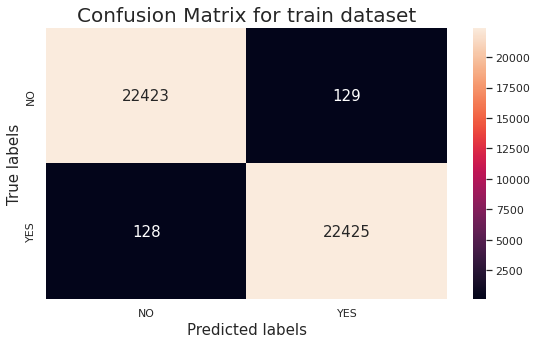

In [87]:
# Get confusion matrix for train data
get_confusion_matrix(xgb_bayes_optimal,X_train_std,y_train,'train')

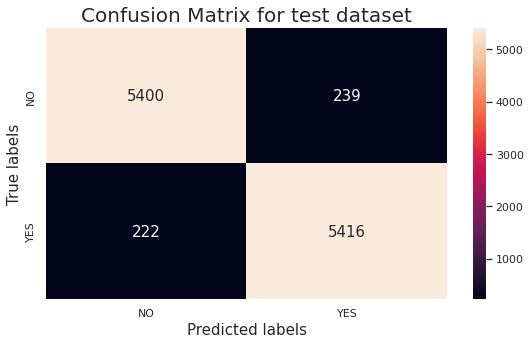

In [88]:
# Get confusion matrix for test data
get_confusion_matrix(xgb_bayes_optimal,X_test_std,y_test,'test')

In [89]:
# Get the accuracy score for the individual model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

In [90]:
# Get the model performance
individual_model_performance(xgb_bayes_optimal, X_train_std, X_test_std, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.994302,0.959178
1,Accuracy,0.994302,0.959120
2,Recall,0.994324,0.960624
3,Precision,0.994280,0.957737
4,log_loss,0.196798,1.411951
5,roc_auc,0.994302,0.959120


### Model Interpretation

In [91]:
# Create a function to get feature importance of random forest model
def get_feature_importance(model_name,X_train,df_for_columns):
  importances = model_name.feature_importances_

  importance_dict = {'Feature' : df_for_columns.columns,
                    'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],3)
  importance_df.sort_values('Feature Importance',ascending=False,inplace =True)
  importance_df.reset_index(drop=True,inplace=True)
  return importance_df[importance_df['Feature Importance']>0]

In [92]:
# Get feature importances
xgb_feature_importance = get_feature_importance(xgb_bayes_optimal,X_train_std, X_train)
xgb_feature_importance

,Feature,Feature Importance
0,housing,0.202
1,job_services,0.074
2,marital_divorced,0.069
3,loan,0.068
4,job_blue-collar,0.067
5,job_technician,0.065
6,job_housemaid,0.057
7,job_retired,0.051
8,marital_married,0.046
9,job_unemployed,0.041


In [93]:
# Get feature importances
xgb_feature_importance = get_feature_importance(xgb_bayes_optimal,X_test_std, X_test)
xgb_feature_importance

,Feature,Feature Importance
0,housing,0.202
1,job_services,0.074
2,marital_divorced,0.069
3,loan,0.068
4,job_blue-collar,0.067
5,job_technician,0.065
6,job_housemaid,0.057
7,job_retired,0.051
8,marital_married,0.046
9,job_unemployed,0.041


In [94]:
# Complex model will be interpreted with SHAP. Install shap 
!pip install shap

     |████████████████████████████████| 564 kB 5.0 MB/s 


In [95]:
import shap

In [96]:
def get_summary_plot_BT(model_name, X_test, df_for_columns):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance, feature_names = df_for_columns.columns)

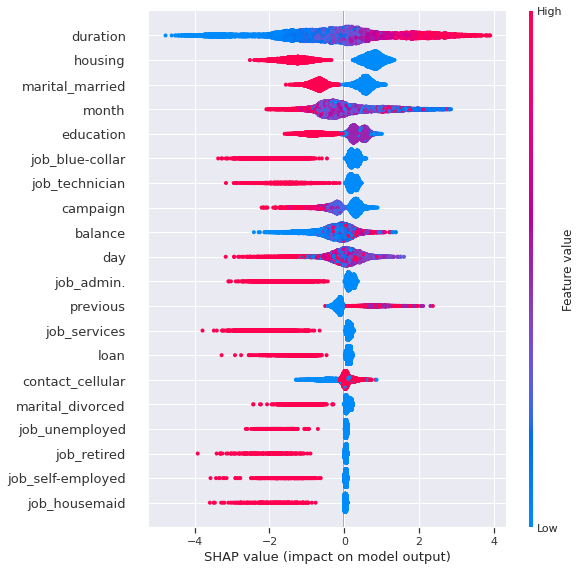

In [97]:
get_summary_plot_BT(xgb_bayes_optimal,X_test_std,X_test)

In [98]:
 def get_summary_bar_plot_BT(model_name,X_test,df_for_columns):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance, plot_type='bar', feature_names = df_for_columns.columns) 

The noise can be described by this figure,
top 6 features shows how noisy the dataset is.

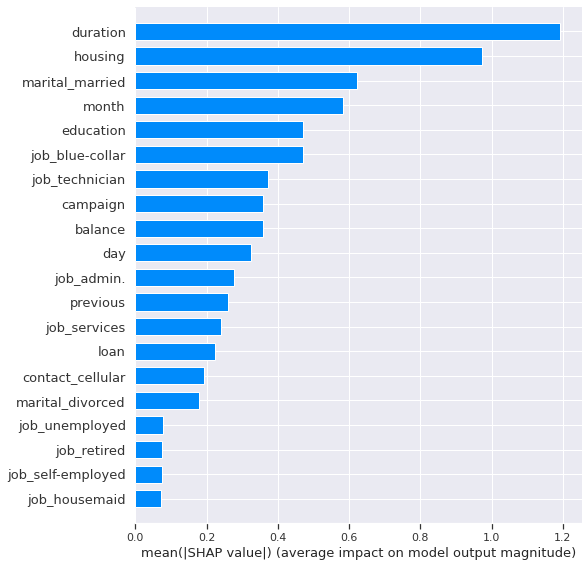

In [99]:
get_summary_bar_plot_BT(xgb_bayes_optimal,X_test_std, X_test)

## <b><u>CatClassifier model

### Model Training - XGBClassfier

In [ ]:
# Since we need to select the best model out of four, using BayesSeachCV
!pip install scikit-optimize

In [ ]:
# To get best values of hyperparameters use BayesSearch crossvalidation
from skopt import BayesSearchCV

In [103]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [104]:
from sklearn import ensemble
from catboost import CatBoostClassifier

In [112]:
start = time. time()

# Create an instance of the RandomForestClassifier
cat_model = CatBoostClassifier(subsample=0.6, random_state=0)

# Grid search
cat_bayes= BayesSearchCV(estimator=cat_model,
                       search_spaces = {'depth': (5,10),
                                    'reg_lambda':(0.01,10)}, n_iter=20,
                       cv = 4, verbose=3, scoring='accuracy')
# Fit the data
cat_bayes.fit(X_train_std,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Streaming output truncated to the last 5000 lines.
5:	learn: 0.5271908	total: 196ms	remaining: 32.5s
6:	learn: 0.5086399	total: 229ms	remaining: 32.5s
7:	learn: 0.4893943	total: 259ms	remaining: 32.1s
8:	learn: 0.4730089	total: 288ms	remaining: 31.7s
9:	learn: 0.4577752	total: 317ms	remaining: 31.4s
10:	learn: 0.4433091	total: 357ms	remaining: 32.1s
11:	learn: 0.4304668	total: 387ms	remaining: 31.8s
12:	learn: 0.4177920	total: 417ms	remaining: 31.6s
13:	learn: 0.4059268	total: 451ms	remaining: 31.7s
14:	learn: 0.3944750	total: 481ms	remaining: 31.6s
15:	learn: 0.3847054	total: 513ms	remaining: 31.5s
16:	learn: 0.3757630	total: 542ms	remaining: 31.3s
17:	learn: 0.3683590	total: 579ms	remaining: 31.6s
18:	learn: 0.3607857	total: 608ms	remaining: 31.4s
19:	learn: 0.3534638	total: 638ms	remaining: 31.2s
20:	learn: 0.3476180	total: 666ms	remaining: 31.1s
21:	learn: 0.3411353	total: 696ms	remaining: 30.9s
22:	learn: 0.3336094	total: 736ms	remaining: 31.3s
23:	learn: 0.3274152	total: 767ms	re

In [113]:
# Get best estimators from the cross validation results
cat_bayes.best_estimator_

In [114]:
# Create a optmial XGBoost model
cat_bayes_optimal = cat_bayes.best_estimator_

In [115]:
# Get the score on both train and test data
cat_bayes_optimal.score(X_train_std,y_train), cat_bayes_optimal.score(X_test_std,y_test)

(0.9959206296419466, 0.9592976855546688)

### Model Performance

In [131]:
# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [132]:
# Get the confusion matrix and label it
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

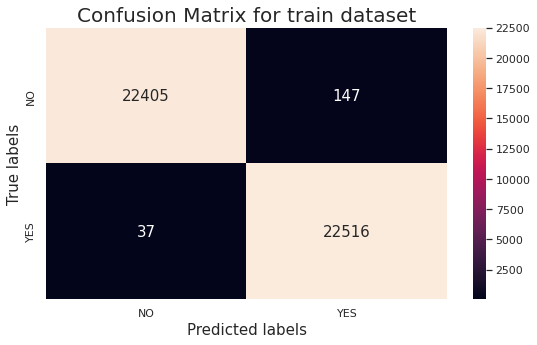

In [133]:
# Get confusion matrix for train data
get_confusion_matrix(cat_bayes_optimal,X_train_std,y_train,'train')

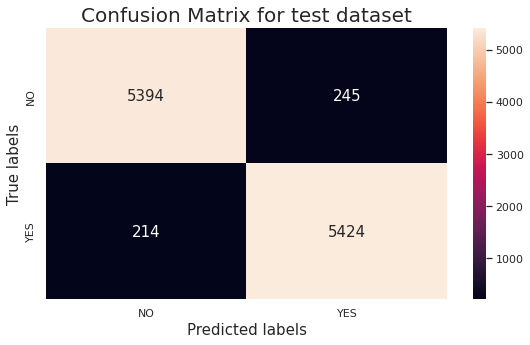

In [134]:
# Get confusion matrix for test data
get_confusion_matrix(cat_bayes_optimal,X_test_std,y_test,'test')

In [135]:
# Get the accuracy score for the individual model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

In [136]:
# Get the model performance
individual_model_performance(cat_bayes_optimal, X_train_std, X_test_std, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.995931,0.959406
1,Accuracy,0.995921,0.959298
2,Recall,0.998359,0.962043
3,Precision,0.993514,0.956783
4,log_loss,0.140899,1.405826
5,roc_auc,0.995921,0.959298


### Model Interpretation

In [137]:
# Create a function to get feature importance of random forest model
def get_feature_importance(model_name,X_train,df_for_columns):
  importances = model_name.feature_importances_

  importance_dict = {'Feature' : df_for_columns.columns,
                    'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],3)
  importance_df.sort_values('Feature Importance',ascending=False,inplace =True)
  importance_df.reset_index(drop=True,inplace=True)
  return importance_df[importance_df['Feature Importance']>0]

In [138]:
# Get feature importances
cat_feature_importance = get_feature_importance(cat_bayes_optimal,X_train_std, X_train)
cat_feature_importance

,Feature,Feature Importance
0,duration,14.774
1,balance,11.241
2,month,10.897
3,day,10.659
4,campaign,7.735
5,housing,7.188
6,education,5.835
7,marital_married,4.853
8,job_blue-collar,4.270
9,contact_cellular,4.020


In [139]:
# Get feature importances
cat_feature_importance = get_feature_importance(cat_bayes_optimal,X_test_std, X_test)
cat_feature_importance

,Feature,Feature Importance
0,duration,14.774
1,balance,11.241
2,month,10.897
3,day,10.659
4,campaign,7.735
5,housing,7.188
6,education,5.835
7,marital_married,4.853
8,job_blue-collar,4.270
9,contact_cellular,4.020


In [140]:
# Complex model will be interpreted with SHAP. Install shap 
!pip install shap

In [141]:
import shap

In [142]:
def get_summary_plot_BT(model_name, X_test, df_for_columns):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance, feature_names = df_for_columns.columns)

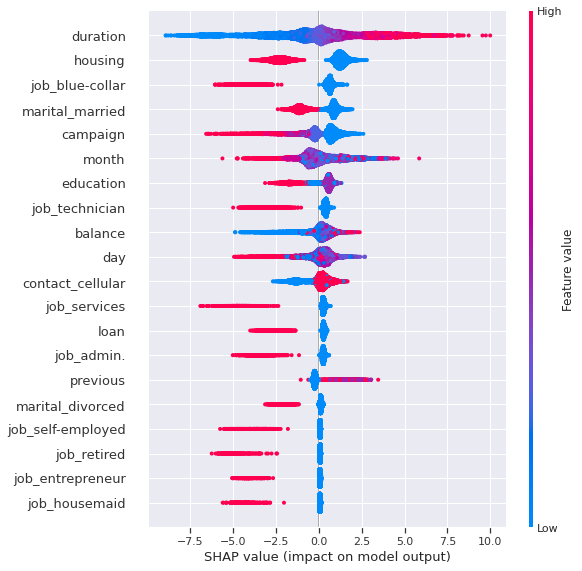

In [143]:
get_summary_plot_BT(cat_bayes_optimal,X_test_std,X_test)

In [144]:
 def get_summary_bar_plot_BT(model_name,X_test,df_for_columns):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance, plot_type='bar', feature_names = df_for_columns.columns) 

The noise can be described by this figure,
top 6 features shows how noisy the dataset is.

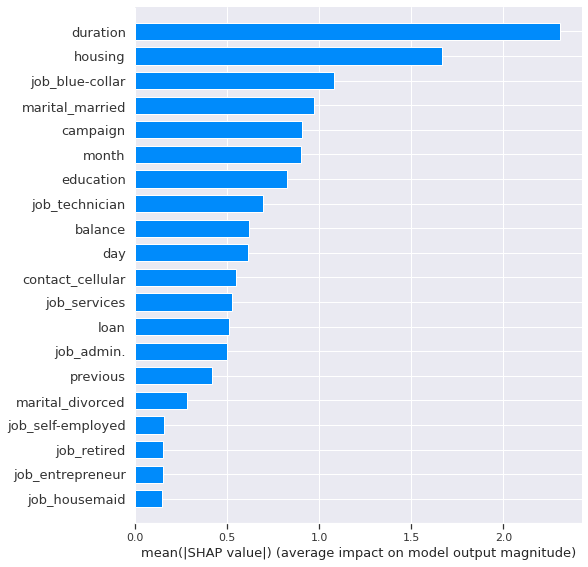

In [145]:
get_summary_bar_plot_BT(cat_bayes_optimal,X_test_std, X_test)

## <b><u>k Nearest Neighbors

### Model Training

In [158]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train_std, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_std, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_std, y_test) 

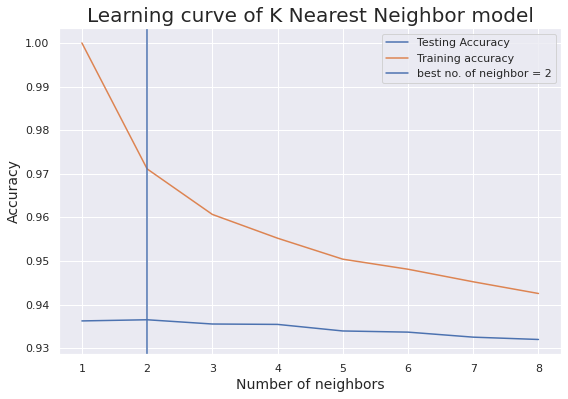

In [163]:
# Generate plot
test_accuracy_list = test_accuracy.tolist()
best_neighbor = test_accuracy_list.index(max(test_accuracy_list)) + 1
plt.figure(figsize=(9,6))

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.axvline(best_neighbor,label = f'best no. of neighbor = {best_neighbor}')

plt.legend()
plt.xlabel('Number of neighbors',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Learning curve of K Nearest Neighbor model',fontsize=20)
plt.show()

In [164]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the model
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=2)

###Model Performance

In [165]:
# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [166]:
# Get the confusion matrix and label it
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

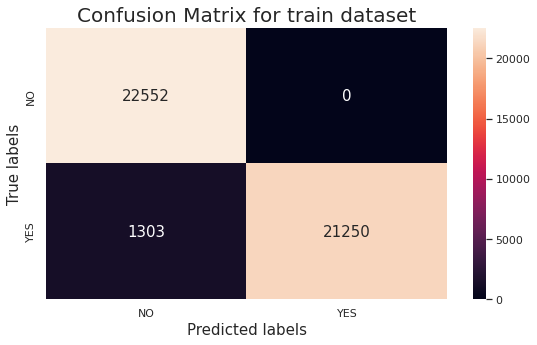

In [167]:
# get confusion matrix for train data
get_confusion_matrix(knn, X_train_std, y_train, 'train')

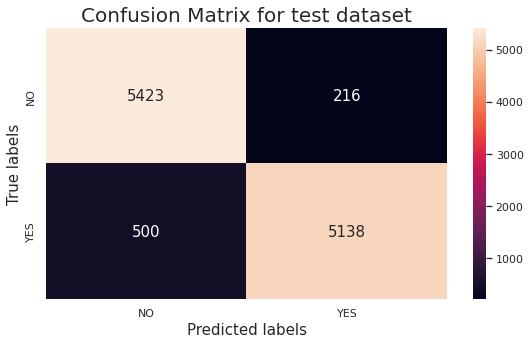

In [168]:
# get confusion matrix for test data
get_confusion_matrix(knn, X_test_std,y_test,'test')

In [169]:
# Get the accuracy score for the individual model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

In [170]:
# Get model performance using function I built, model_performance
individual_model_performance(knn,X_train_std,X_test_std,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.970253,0.934862
1,Accuracy,0.971112,0.936508
2,Recall,0.942225,0.911316
3,Precision,1.000000,0.959656
4,log_loss,0.997761,2.192953
5,roc_auc,0.971112,0.936506


# <b><u>Model Comparison based on performance

##function format : models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test)

In [146]:
# Get the accuracy score for the model
def models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test):
  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix
  # Initialize the variables
  roc_auc , accuracy , precision , recall ,logloss , fscore = [],[],[],[],[],[]
  for model_name in model_list:
    # Get the predicted classes
    train_class_preds = model_name.predict(X_train)
    test_class_preds = model_name.predict(X_test)

    # Get train and test scores for that performance metric
    fscore.append((round(f1_score(y_train,train_class_preds),3) ,round(f1_score(y_test, test_class_preds),3)))
    accuracy.append((round(accuracy_score(y_train,train_class_preds),3),round(accuracy_score(y_test, test_class_preds),3)))
    recall.append((round(recall_score(y_train,train_class_preds),3), round(recall_score(y_test, test_class_preds),3)))
    precision.append((round(precision_score(y_train,train_class_preds),3), round(precision_score(y_test, test_class_preds),3)))
    logloss.append((round(log_loss(y_train,train_class_preds),3),round(log_loss(y_test, test_class_preds),3)))
    roc_auc.append((round(roc_auc_score(y_train,train_class_preds),3), round(roc_auc_score(y_test, test_class_preds),3)))

  # Prepare a metric dataframe
  model_comparison = pd.DataFrame(list(zip(model_name_list,roc_auc,accuracy,precision,recall,logloss,fscore)), columns = ['Model_Name','roc_auc_score','Accuracy_score','Precision_score','Recall_score','log_loss','f_score'])
  return model_comparison 

## Get model comparison

In [179]:
from sklearn.metrics import plot_confusion_matrix

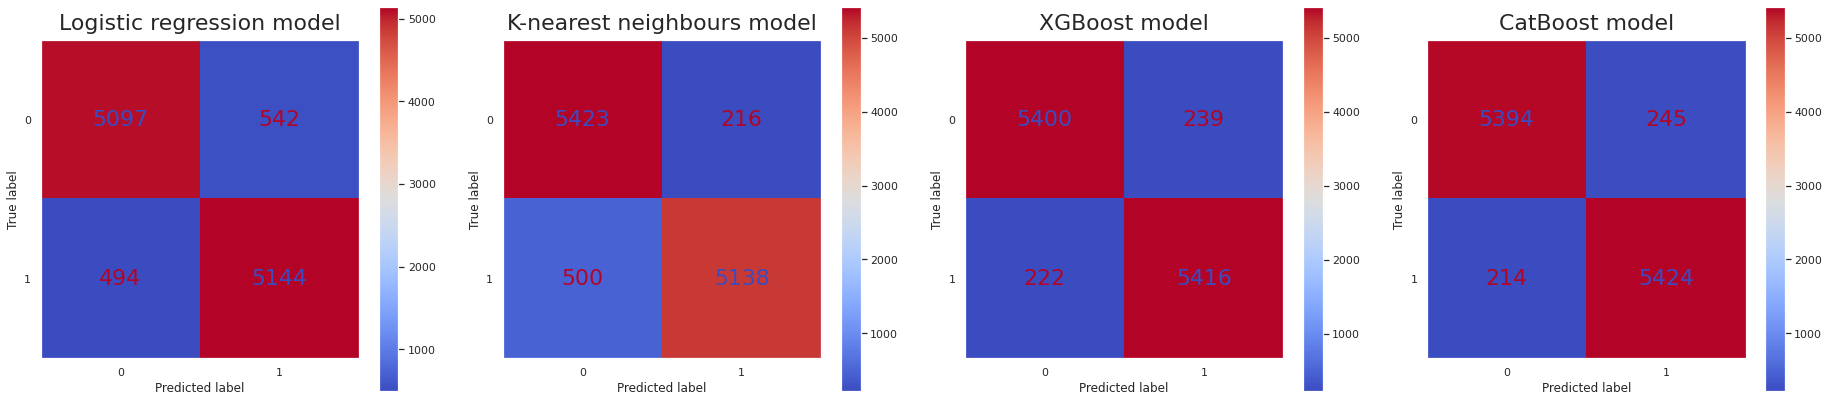

In [181]:
# Compare the models' performance on test dataset
fig, axes = plt.subplots(1,4, figsize=(26,6))
plt.rcParams.update({'font.size': 22})

classifiers = [lr,knn, xgb_bayes_optimal,cat_bayes_optimal]
model_names = ['Logistic regression model','K-nearest neighbours model', 'XGBoost model','CatBoost model']
for cls, ax, title in zip(classifiers, axes.flatten(),model_names):
    plot_confusion_matrix(cls, X_test_std, y_test, cmap=plt.cm.coolwarm, ax=ax)
    ax.grid(False)
    ax.set_title(title, size=22, pad=10)

plt.tight_layout()
plt.show()

In [176]:
# fill the model list
model_list = [lr, knn,xgb_bayes_optimal,cat_bayes_optimal]

# fill the model name list
model_name_list = ['Logistic regression model', 'K-Nearest Neighbor model','XGboost model', 'Catboost model']

In [177]:
# Get the performance of all the model in tabular format
models_comparison(model_list, model_name_list, X_train_std, X_test_std, y_train, y_test)

,Model_Name,roc_auc_score,Accuracy_score,Precision_score,Recall_score,log_loss,f_score
0,Logistic regression model,"(0.904, 0.908)","(0.904, 0.908)","(0.904, 0.905)","(0.905, 0.912)","(3.31, 3.173)","(0.904, 0.909)"
1,K-Nearest Neighbor model,"(0.971, 0.937)","(0.971, 0.937)","(1.0, 0.96)","(0.942, 0.911)","(0.998, 2.193)","(0.97, 0.935)"
2,XGboost model,"(0.994, 0.959)","(0.994, 0.959)","(0.994, 0.958)","(0.994, 0.961)","(0.197, 1.412)","(0.994, 0.959)"
3,Catboost model,"(0.996, 0.959)","(0.996, 0.959)","(0.994, 0.957)","(0.998, 0.962)","(0.141, 1.406)","(0.996, 0.959)"
